In [1]:
import pandas as pd 
import numpy as np  
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import glob

In [2]:
csv_files = ['1Wednesday-workingHours.csv','2Friday-WorkingHours-Afternoon-DDos.csv']
print(csv_files)

['1Wednesday-workingHours.csv', '2Friday-WorkingHours-Afternoon-DDos.csv']


In [3]:
dataset = [pd.read_csv(f) for f in csv_files]

In [4]:
for d in dataset:
    print(d.shape)

(692703, 79)
(225745, 79)


In [5]:
dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)
dataset.shape

(818169, 79)

In [6]:
dataset.columns = dataset.columns.str.lstrip()

In [7]:
dataset.drop(['Fwd Header Length.1'],axis=1,inplace=True)
columns=list(dataset.columns.values)
print(columns)

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [8]:
dataset.Label.value_counts()

BENIGN              497898
DoS Hulk            171509
DDoS                128007
DoS GoldenEye        10279
DoS slowloris         5289
DoS Slowhttptest      5176
Heartbleed              11
Name: Label, dtype: int64

In [9]:
label = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [10]:
dataset.dropna(inplace=True)

In [11]:
type(dataset)

pandas.core.frame.DataFrame

In [12]:
np.all(np.isfinite(dataset))

False

In [13]:
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [14]:
np.all(np.isfinite(dataset))

False

In [15]:
np.any(np.isnan(dataset))

True

In [16]:
dataset.dropna(inplace=True)
np.any(np.isnan(dataset))

False

In [17]:
np.all(np.isfinite(dataset))

True

In [18]:
dataset = dataset.merge(label, how='outer', left_index=True, right_index=True)

In [19]:
dataset.Label.value_counts()

BENIGN              497898
DoS Hulk            171509
DDoS                128007
DoS GoldenEye        10279
DoS slowloris         5289
DoS Slowhttptest      5176
Heartbleed              11
Name: Label, dtype: int64

C:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DoS slowloris'),
  Text(1, 0, 'DoS Slowhttptest'),
  Text(2, 0, 'DoS Hulk'),
  Text(3, 0, 'DoS GoldenEye'),
  Text(4, 0, 'Heartbleed'),
  Text(5, 0, 'DDoS')])

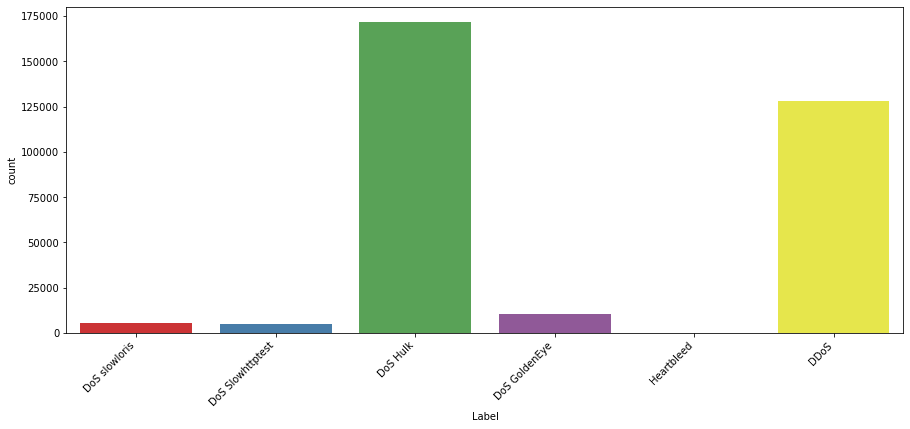

In [20]:
import seaborn as sns
data = dataset['Label'].where(dataset['Label'] != "BENIGN")
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

# Normalisation

In [21]:
# using standard scaler for normalizing
min_max_scale = preprocessing.MinMaxScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = min_max_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [22]:

numeric_col = dataset.select_dtypes(include='number').columns
dataset = normalization(dataset.copy(),numeric_col)
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.001221,3.192417e-04,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.005936,4.000000e-06,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004699,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.001343,9.133333e-06,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.094516,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.005936,1.267250e-04,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.063619,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.001343,9.108333e-06,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.103772,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818164,0.936550,5.166667e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
818165,0.936611,6.083333e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
818166,0.936565,6.333333e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
818167,0.935772,4.083333e-07,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [23]:
dataset.shape

(818169, 78)

# Binary Classification

In [24]:
bin_label = pd.DataFrame(dataset.Label.map(lambda x:'normal' if x=='BENIGN' else 'abnormal'))

In [25]:
# creating a dataframe with binary labels (normal,abnormal)
bin_dataset = dataset.copy()
bin_dataset['Label'] = bin_label

In [26]:
le3 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le3.fit_transform)
bin_dataset['intrusion'] = enc_label

In [27]:
le3.classes_

array(['abnormal', 'normal'], dtype=object)

In [28]:
np.save("le3_classes.npy",le3.classes_,allow_pickle=True)

In [29]:
bin_dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,intrusion
0,0.001221,0.000319,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
1,0.005936,0.000004,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
2,0.001343,0.000009,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.094516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
3,0.005936,0.000127,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.063619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
4,0.001343,0.000009,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.103772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1


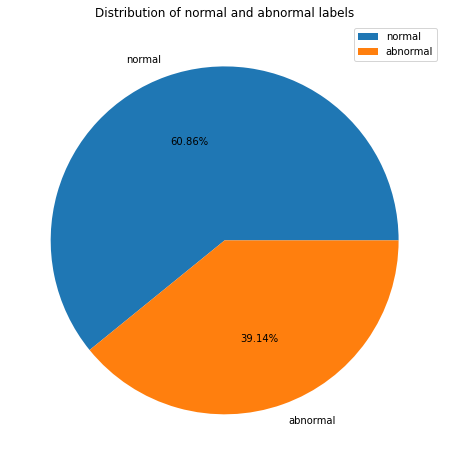

In [30]:
plt.figure(figsize=(8,8))
plt.pie(bin_dataset.Label.value_counts(),labels=bin_dataset.Label.unique(),autopct='%0.2f%%')
plt.title("Distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [31]:
bin_dataset.to_csv("./datasets/bin_data_2017.csv")
bin_dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,intrusion
0,0.001221,3.192417e-04,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
1,0.005936,4.000000e-06,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
2,0.001343,9.133333e-06,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.094516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
3,0.005936,1.267250e-04,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.063619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
4,0.001343,9.108333e-06,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.103772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818164,0.936550,5.166667e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
818165,0.936611,6.083333e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
818166,0.936565,6.333333e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1
818167,0.935772,4.083333e-07,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,1


# Multi-class Classification

In [32]:
multi_dataset = dataset.copy()
multi_label = pd.DataFrame(multi_dataset.Label)

In [33]:
le4 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le4.fit_transform)
multi_dataset['intrusion'] = enc_label

In [34]:
le4.classes_

array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'Heartbleed'], dtype=object)

In [35]:
np.save("le4_classes.npy",le4.classes_,allow_pickle=True)

In [36]:
multi_dataset.to_csv('./datasets/multi_data_2017.csv')
multi_dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,intrusion
0,0.001221,3.192417e-04,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
1,0.005936,4.000000e-06,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
2,0.001343,9.133333e-06,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.094516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
3,0.005936,1.267250e-04,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.063619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
4,0.001343,9.108333e-06,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.103772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818164,0.936550,5.166667e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
818165,0.936611,6.083333e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
818166,0.936565,6.333333e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
818167,0.935772,4.083333e-07,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
